## MyTISSE. First prototype testing - Preliminary analysis

On June 8th, 2023 a first testing of the prototype of the "MyTISSE" experience was performed. It involved 24 participants, taken from an audience of Master students, PhD candidates and young researcher in the domain of Digital Humanities. See the experimental protocol for the description of the set-up of the testing session.

### Table of Contents
* [Perception of meaningfulness](#h3meaning)
    * [Summarization task](#h4sumup)
    * [Meaningfulness factors](#h4m_fact)
* [Choice of the palette](#h3palette)
    * [Justification](#h4palettejust)
* [Emotional engagement](#h3emotion)
    * [Feelings](#h4emotion)
        * [Bathers by a river](#h5or)
        * [1st edited version](#h5_1)
        * [2nd edited version](#h5_2)
    * [Caring attitude](#h4care)
        * [Loss](#h5care_1)
        * [Perceived benefit](#h5care_2)
* [General appreciation](#h3general)

In [1]:
# Import main dependencies
import matplotlib.pyplot as plt
import pandas as pd
import collections

mytisse_data = pd.read_csv("data/data_cleaned.csv", sep=";")

### Perception of meaningfulness <a class="anchor" id="h3meaning"></a>

#### Summarization task <a class="anchor" id="h4sumup"></a>

> Summarize the experience you have just participated in  focusing on the aspects you considered more relevant according to your personal experience

Visitors were asked to summarize the experience, stressing more relevant elements. The following script allow to compute most frequent words applying stopwords removal and lemmatization. As for now, it provides only words occurring more than six times, yet the threshold can be changed as parameter of the function `return_topwords`. 

This demonstrates that the most important words are (_shape_ and _figure_ are computed together as in this context they are synonym):

| Word           | Frequency      |
|----------------|----------------|
| painting       | 21             |
| figure / shape | 19             |
| color          | 15             |
| interesting    | 9              |

In [2]:
# Import NLTK library to process textual data
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

# Function to convert dict in top-words (set threshold)
def return_topwords(freq_dict, threshold):
    word_counter = collections.Counter(freq_dict)
    for word, count in word_counter.most_common():
        if count >= threshold:
            print(word, ": ", count)

def topwords_calculator(df_col): #
    text = " ".join(cat for cat in df_col).replace('\n', '') 

    wordcount = {} # Instantiate a dictionary

    # Frequency calculator

    for word in text.lower().split():
        #Preprocessing
        for char in [".", ",", ":", "\"", "!","\'s"]:                      #punctuation removal
            word = word.replace(char,"")         
        if word not in stopwords and word not in ["could", "without"]:     #stopwords removal
            word = lemmatizer.lemmatize(word)                              #lemmatization
            word = word.replace("colour","color")                          #AE / BE rectification
            # Start counter
            if word not in wordcount:
                wordcount[word] = 1
            else:
                wordcount[word] += 1
    return wordcount

# Prepare NLTK tools for textual pre-processing (valid for the entire dataset)
stopwords = stopwords.words('english')
lemmatizer = WordNetLemmatizer() 

return_topwords(topwords_calculator(mytisse_data.q1), 6)

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/manuele/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


painting :  21
color :  15
figure :  13
interesting :  9
work :  8
different :  7
shape :  6


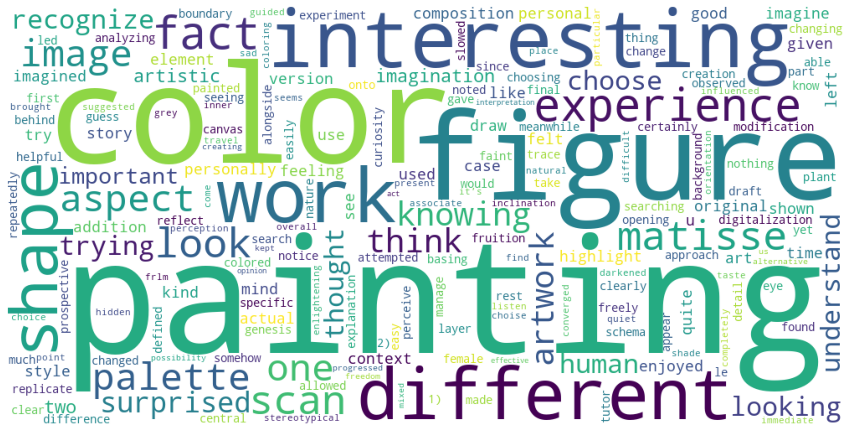

In [3]:
# Visualization through WordCloud
import matplotlib.pyplot as plt
from wordcloud import WordCloud

def wordcloud_generator(wc_dict):
    wordcloud = WordCloud(width = 1000, height = 500, background_color="white").generate_from_frequencies(wc_dict)

    plt.figure(figsize=(15,8))
    plt.imshow(wordcloud)
    plt.axis("off")

wordcloud_generator(topwords_calculator(mytisse_data.q1))

#### Meaningfulness factors <a class="anchor" id="h4m_fact"></a>

> Here there are some aspects about Bathers by a river that have been covered by MyTISSE. Please order them from the one you perceived as most important (1) to the less relevant one (5)

The suggested elements are: 
- The fact that it was conceived together with other two famous paintings
- The impact of the war
- The change of color
- The possibility to reconstruct the versions painting through conservation data
- The contact with other artistic avant-guardes (e.g. Cubism)

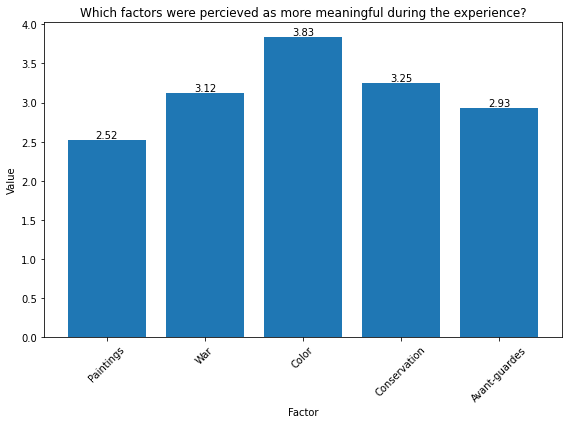

In [4]:
# Calculate the mean value for each column (one column, one factor)
paintings = mytisse_data['q2_music_dance'].astype(float).mean()
war = mytisse_data['q2_war'].astype(float).mean()
color_change = mytisse_data['q2_color'].astype(float).mean()
conservation_data = mytisse_data['q2_conservation'].astype(float).mean()
influence_cubism = mytisse_data['q2_cubism'].astype(float).mean()

# Plot the values of the five meaningfulness factors as bars
meaning_factors = {"Paintings": paintings, "War": war, "Color": color_change, "Conservation": conservation_data, "Avant-guardes": influence_cubism}

keys = list(meaning_factors.keys())
values = list(meaning_factors.values())
positions = range(len(keys))

plt.figure(figsize=(8, 6))
bars = plt.bar(positions, values, tick_label=keys)

plt.xlabel('Factor')
plt.ylabel('Value')
plt.title('Which factors were percieved as more meaningful during the experience?')

for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height,
            '{:.2f}'.format(height), ha='center', va='bottom')
plt.xticks(rotation = 45)

plt.tight_layout()
plt.show()

In order of meaningfulness, the factors are:
1) The change of color (3.83)
2) The possibility to reconstruct the versions painting through conservation data (3.25)
3) The impact of the war (3.12)
4) The contact with other artistic avant-guardes (e.g. Cubism) (2.93)
5) The fact that it was conceived together with other two famous paintings (2.52)

### The choice of the palette <a class="anchor" id="h3palette"></a>

In the initial drawing task, participants were asked to draw on a XRF scans, choosing only one color palette

Palette A    16
Palette B     8
Name: q3, dtype: int64


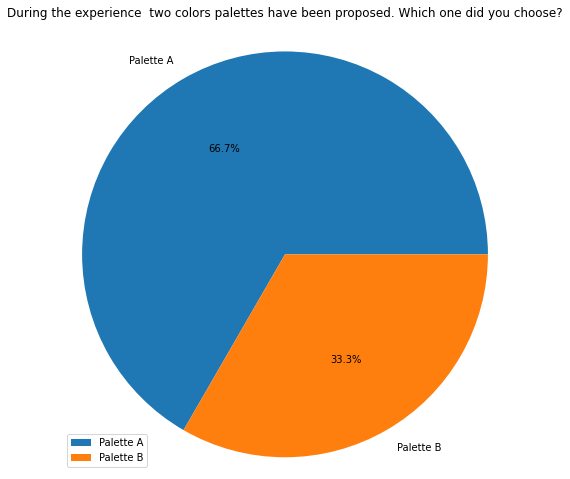

In [5]:
def pie_viz(question_n, title):
    pie_df = mytisse_data[question_n].value_counts()
    print(pie_df)

    # Plotting a pie chart
    plt.figure(figsize=(8, 8))
    pie_df.plot(kind='pie', autopct='%1.1f%%')
    plt.axis('equal')
    plt.ylabel('')
    plt.title(title, pad=20)
    plt.legend()    
    plt.show()

pie_viz("q3", "During the experience  two colors palettes have been proposed. Which one did you choose?")

#### Justification <a class="anchor" id="h4palettejust"></a>

Besides stating their palette preference, participants were also asked to justify their choice. As other traditional free text answers, these data are valued according to keywords frequency.

color :  13
palette :  6
figure :  5
vibrant :  4
one :  4
human :  3
title :  3
seemed :  3
tone :  3
painting :  3


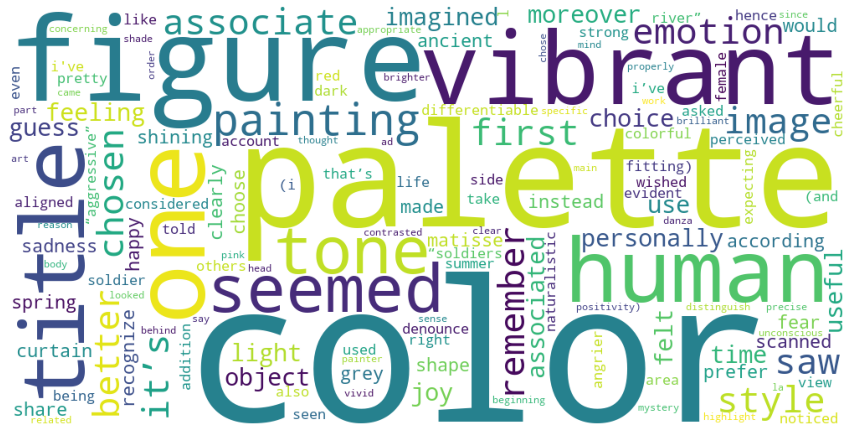

In [6]:
# For Palette A
palette_a = mytisse_data[mytisse_data['q3'] == 'Palette A']['q3_justification']

return_topwords(topwords_calculator(palette_a), 3)
wordcloud_generator(topwords_calculator(palette_a))

color :  7
painting :  4
chose :  3
palette :  3


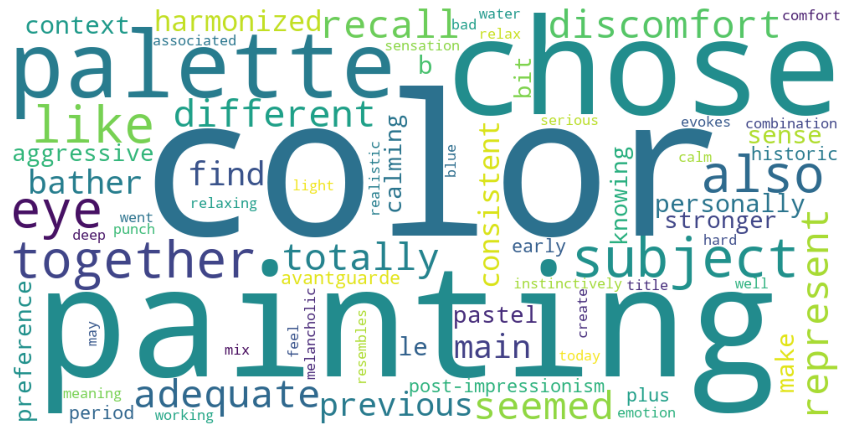

In [7]:
# For Palette B
palette_b = mytisse_data[mytisse_data['q3'] == 'Palette B']['q3_justification']

return_topwords(topwords_calculator(palette_b), 3)
wordcloud_generator(topwords_calculator(palette_b))

The data show no particular justification for the choice of the palette, but for the **association of palette A to more vibrant colors**. From the second wordcloud we also see that the second palette is associate to terms like <i>discomfort</i> or <i>melancholic</i> but their occurrence is not systematical (only one occurrence each).

### Emotional engagement <a class="anchor" id="h3emotion"></a>

A set of questions was presented to the participants to understand and quantify their emotional engagement with the artwork

#### Feelings <a class="anchor" id="h4emotion"></a>

Q4, Q10 and Q12 are similar, as they ask to quantify the emotions felt while observing three different paintings: <i>Bathers by a river</i> and two digital modification of the artwork, in which the colours of this canvas were swapped with the palette used by Matisse to paint <i>The Joy of Life</i> (<i>La bonheur de vivre</i>) (Edit 1) and viceversa (Edit 2):

As <i>La bonheur de vivre</i> is traditionally shown while presenting Matisse in educational context, it is necessary to analyze which is the previous preparation of the participants on Parisian artistic milieu (Q9). **79%** have already studied this cultural phenomenon

Yes, in high school       12
Yes, at university         6
No                         5
Yes, in other contexts     1
Name: q9, dtype: int64


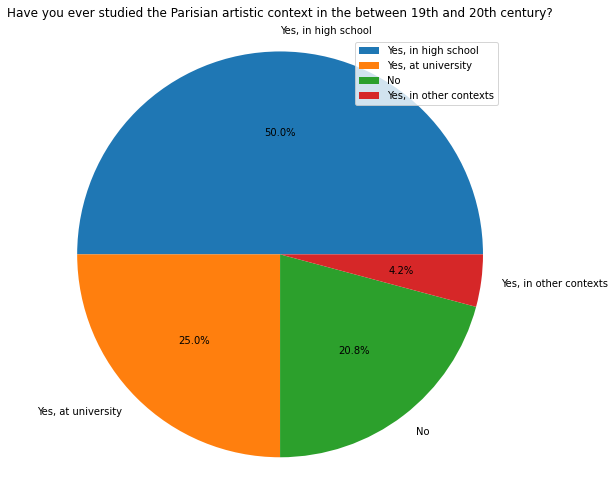

In [8]:
pie_viz("q9", 'Have you ever studied the Parisian artistic context in the between 19th and 20th century?')

<a class="anchor" id="h5or"></a>
As done also in Q2, when more values where assigned by the participant to a single observation (i.e. emotion), only the avarage between the two provided value was considered.

The chosen feelings are taken from Plutchik wheel of emotions, which enables to detect primary, secondary, and tertiary dyads as shown in this graph ([links](https://www.simonwhatley.co.uk/writing/plutchik-wheel-of-emotion/)):

<img src="img/plutchik-wheel-of-emotion.png" width="45%">
<img src="img/plutchik-wheel-of-emotion-dyads.png" width="45%">

In this analysis, anticipation and interest are considered exchangeable, as in the project [muse](https://www.epfl.ch/labs/emplus/projects/muse/). The visualization through the library pyplutchick is available at the following [Jupyter Notebook](https://github.com/ManueleVeggi/mytisse/blob/main/testing_sessions/230608_unibo/plutchick_emotions.ipynb).

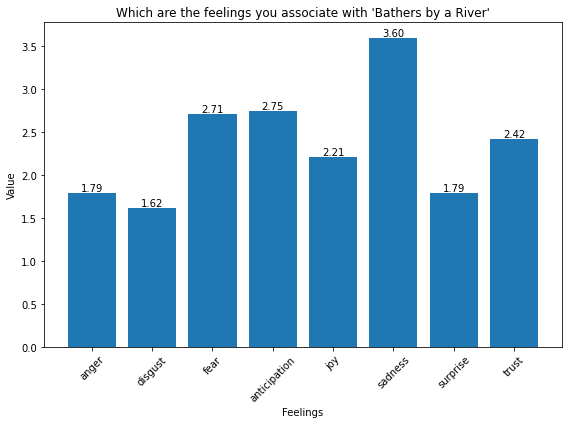

In [9]:
# Apply similar script used for Q2. Implemented as function for further resuse
def emotion_data(question):
    anger = mytisse_data['{0}_anger'.format(question)].astype(float).mean()
    disgust = mytisse_data['{0}_disgust'.format(question)].astype(float).mean()
    fear = mytisse_data['{0}_fear'.format(question)].astype(float).mean()
    interest = mytisse_data['{0}_interest'.format(question)].astype(float).mean()
    joy = mytisse_data['{0}_joy'.format(question)].astype(float).mean()
    sadness = mytisse_data['{0}_sadness'.format(question)].astype(float).mean()
    surprise = mytisse_data['{0}_surprise'.format(question)].astype(float).mean()
    trust = mytisse_data['{0}_trust'.format(question)].astype(float).mean()

    feelings = {
        "anger": round(anger, 2), 
        "disgust": round(disgust, 2), 
        "fear": round(fear, 2), 
        "anticipation": round(interest, 2), 
        "joy": round(joy, 2),
        "sadness": round(sadness, 2),
        "surprise": round(surprise, 2),
        "trust": round(trust, 2)}
    
    return feelings

def emotion_plot(dict_feel, title_plot):
    keys = list(dict_feel.keys())
    values = list(dict_feel.values())
    positions = range(len(keys))

    plt.figure(figsize=(8, 6))
    bars = plt.bar(positions, values, tick_label=keys)

    plt.xlabel('Feelings')
    plt.ylabel('Value')
    plt.title(title_plot)

    for bar in bars:
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width() / 2, height,
                '{:.2f}'.format(height), ha='center', va='bottom')
    plt.xticks(rotation = 45)

    plt.tight_layout()
    plt.show()

emotion_plot(emotion_data("q4"), "Which are the feelings you associate with 'Bathers by a River'")

The palette mainly vehiculates **sadness** (3.60), followed by **anticipation** (2.75) and **fear** (2.71).
According to Plutchik:
- sadness + anticipation: **pessimism**
- anticipation + fear: **anxiety**
- fear + sadness: **despair**

The first edited version of the painting has instead these values: <a class="anchor" id="h5_1"></a>

<img src="img/Matisse Bathers Revised.png" width="40%">

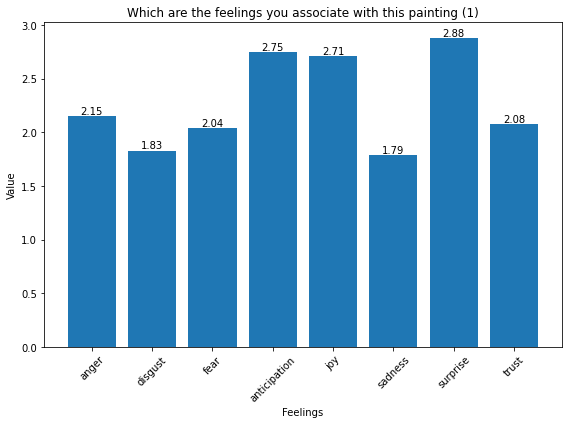

In [10]:
# First edit
emotion_plot(emotion_data("q10"), "Which are the feelings you associate with this painting (1)")

In this first edited version:
- Primary emotions
    - **surprise** (2.88)
    - **anticipation** (2.75)
    - **joy** (2.71)
- Derived dyads
    - surprise + joy: **delight**
    - anticipation + joy: **optimism**
    - surprise + anticipation: opposite emotions

The following values refer to the second version instead: <a class="anchor" id="h5_2"></a>

<img src="img/Matisse Bonheur Revised.png" width="40%">

posx and posy should be finite values
posx and posy should be finite values


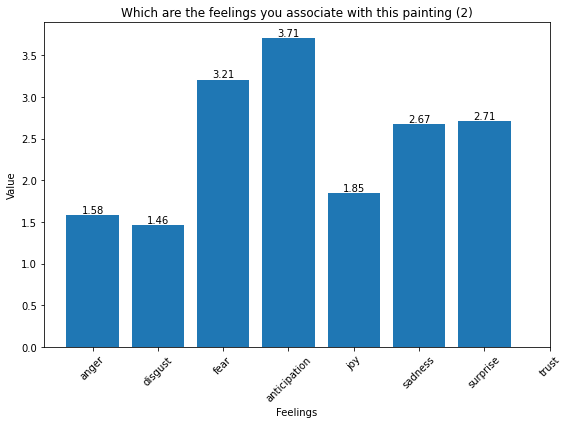

In [11]:
# Second edit
emotion_plot(emotion_data("q12"), "Which are the feelings you associate with this painting (2)")

In this second edited version:
- Primary emotions
    - **interest** (3.71)
    - **fear** (3.21)
    - **surprise** (2.71)
- Derived dyads
    - surprise + fear: **awe**
    - interest + fear: **anxiety**
    - surprise + interest: opposite emotions
    
The following snippet of code can be used to better compare the previous histograms:

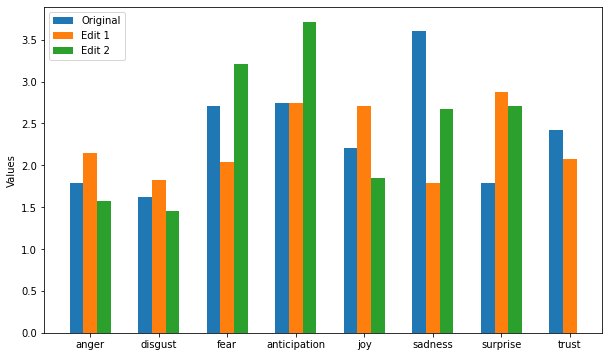

,Original,Edit 1,Edit 2
anger,1.79,2.15,1.58
disgust,1.62,1.83,1.46
fear,2.71,2.04,3.21
anticipation,2.75,2.75,3.71
joy,2.21,2.71,1.85
sadness,3.60,1.79,2.67
surprise,1.79,2.88,2.71
trust,2.42,2.08,NaN


In [12]:
# To plot the values, follow similar approach as before 
keys = list(emotion_data("q4").keys())
values1 = list(emotion_data("q4").values())
values2 = list(emotion_data("q10").values())
values3 = list(emotion_data("q12").values())

x = range(len(keys))

width = 0.2
plt.figure(figsize=(10, 6))

plt.bar(x, values1, width=width, label='Original')
plt.bar([i + width for i in x], values2, width=width, label='Edit 1')
plt.bar([i + 2 * width for i in x], values3, width=width, label='Edit 2')
plt.xticks([i + width for i in x], keys)
plt.ylabel('Values')

plt.legend()

plt.show()

# For a better comparison, print values as pd.DataFrame

pd.DataFrame({'Original': emotion_data("q4"), 'Edit 1': emotion_data("q10"), 'Edit 2': emotion_data("q12")})

Participants were also asked to assign a title to this second edited version (Q11): these proposed titles are firstly processed with the previously presented technique for free-text answers



bather :  4
life :  3
river :  3


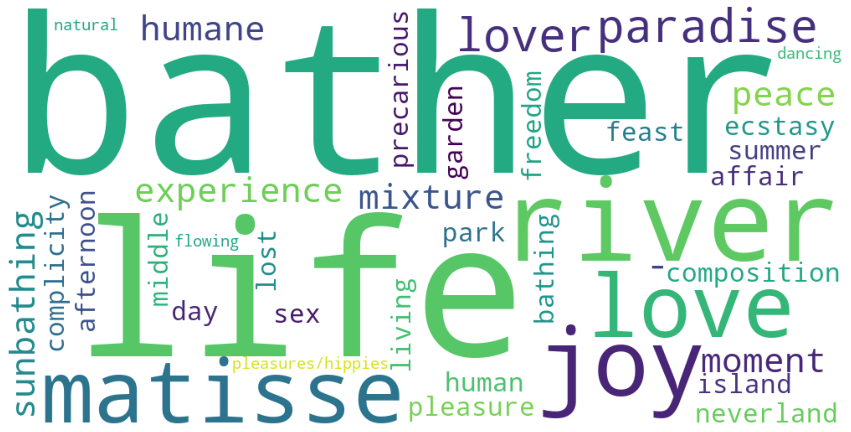

In [13]:
edit2_title = mytisse_data['q11']
return_topwords(topwords_calculator(edit2_title), 3)
wordcloud_generator(topwords_calculator(edit2_title))

In these titles, most frequent terms can be associated with the original titles of the two canvases by Matisse (<i>Bathers by a river</i> and <i>Joy of life</i>).

#### Caring attitude <a class="anchor" id="h4care"></a>

The main focus of the survey was inquirying the percpetion of meaningfulness: the analysis of sense of care and the emotional link was hence limited to two questions.

The first question (Q5): <a class="anchor" id="h5care_1"></a>

> The Art Institute of Chicago is conducting further researches on Bathers by a River to better document this artwork as it is undergoing an irremediable corrupting process. In few years the damages to the pictorial film may be unrepairable. How much would you be sorry for this loss?

count    24.000000
mean      4.541667
std       0.508977
min       4.000000
25%       4.000000
50%       5.000000
75%       5.000000
max       5.000000
Name: q5, dtype: float64
5    13
4    11
Name: q5, dtype: int64


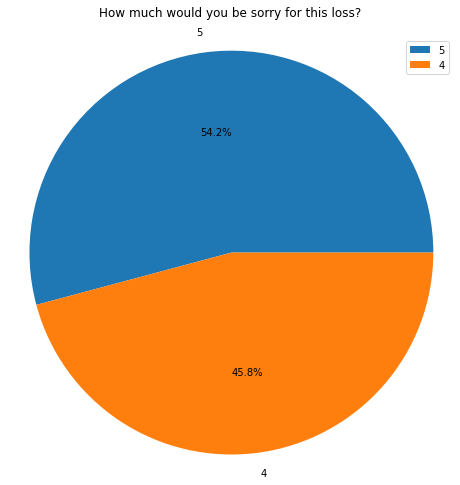

In [14]:
print(mytisse_data['q5'].describe())
pie_viz("q5", "How much would you be sorry for this loss?")

The result show a very **deep emotional involment**, since all the values range in the interval [4; 5]. The question proposed a Lickert scale from 1 to 5. 

The second question (Q6): <a class="anchor" id="h5care_2"></a>

> "Looking at <i>Bathers By a River</i> helped me". Do you agree with this statement? If yes why?

In [15]:
# Firstly, calculate how many participants affirmed they did not gain any benefit

no_occurrences = mytisse_data['q6'].str.contains('no', case=False, regex=False).sum() + mytisse_data['q6'].str.contains(r"(?i)don't").sum()

print("Approximative amount of participants who denied any benefit: ", no_occurrences)
print("With manual count: 6")

Approximative amount of participants who denied any benefit:  8
With manual count: 6


helped :  10
painting :  10
yes :  9
think :  5
art :  5
way :  4
thought :  4
color :  4
artwork :  4
different :  3
artistic :  3
understand :  3
nature :  3
sense :  3
thinking :  3
context :  3


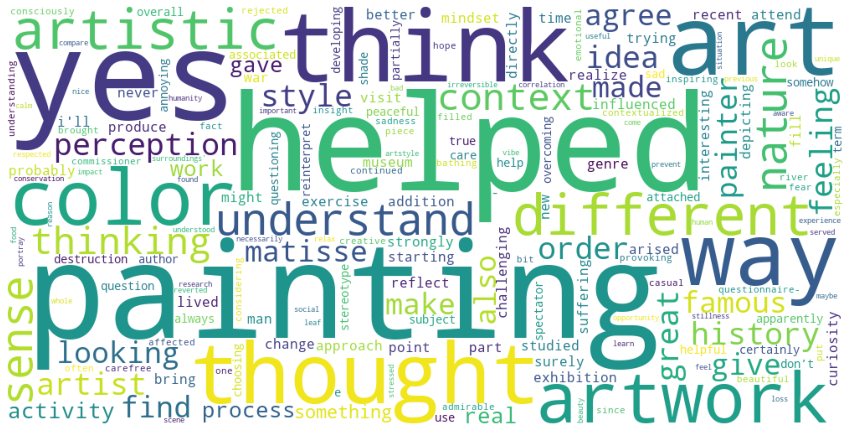

In [16]:
benefit = mytisse_data['q6']
return_topwords(topwords_calculator(benefit), 3)
wordcloud_generator(topwords_calculator(benefit))

Negative answers do not appear in the wordcloud as no is considered stopword in NLTK, instead of "yes". The word cloud actually confirm a positive impact of the experience, which is apparently mainly linked to visitor believes (</i>think</i> and its derived form occurr 9 times), understanding (<i>understand</i>, 3 times), with a special attention to <i>color</i> (4 times).

On the contrary, one participant over four claimed not to have received any benefit from "MyTISSE".

### General appreciation <a class="anchor" id="h3general"></a>

Lastly two questions were devoted to the analysis of the satisfaction of the experience:


Yes    24
Name: q7, dtype: int64


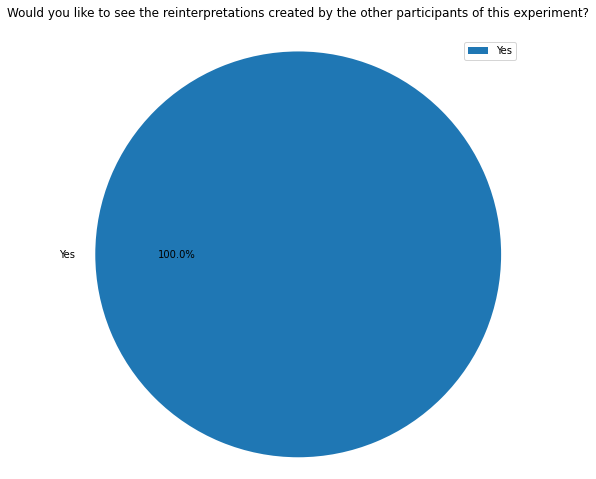

Yes    24
Name: q8, dtype: int64


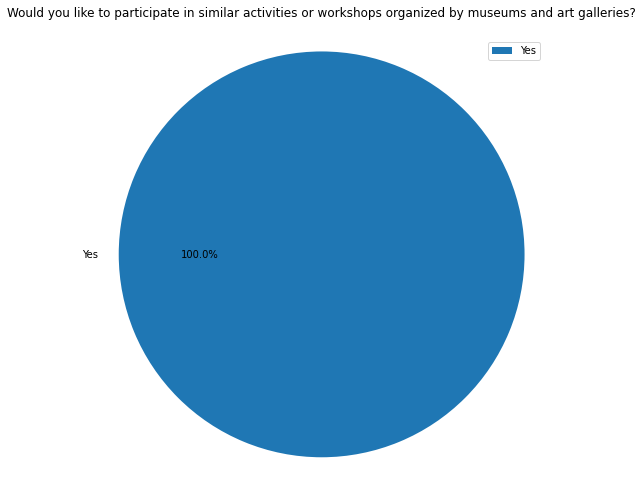

In [17]:
pie_viz("q7", 'Would you like to see the reinterpretations created by the other participants of this experiment?')
pie_viz("q8", 'Would you like to participate in similar activities or workshops organized by museums and art galleries?')

The charts show an unanymous appreciation of the experience.